In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM,GRU, SimpleRNN, Dense, Dropout
import os
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

#fungsi menentukan data input dan target output
def create_my_dataset(df,df_y):
    x = []
    y = []
    for i in range (l, df.shape[0]): #diulang sebanyak panjang data-l+1
        x.append(df[i-l:i,:]) #sekuen sepanjang l sebagai input
        y.append(df_y[i,0]) #nilai output sekuen ke l+1
    x = np.array(x)
    y = np.array(y)
    y = y.reshape(-1,1)
    return x,y

#fungsi mengiris data training dan testing pada fitur tertentu
def get_slice(m,r,col,t): #t=0 untuk skrg, t=-1 utk sehari sebelumnya
    #get column
    df_s = df_old[col].values
    df_s = df_s.reshape(-1,1)

    #slicing
    train_s = df_s[l+t:int(r*m)+t]
    if t==0:
        test_s = df_s[int(r*m):]
    else:
        test_s = df_s[int(r*m)+t:t]

    train_s = np.array(train_s)
    train_s = train_s.reshape(-1,1)
    test_s = np.array(test_s)
    test_s = test_s.reshape(-1,1)

    return train_s,test_s

In [5]:
def set_target(dataframe, days, price_col, percent_threshold):
    # dataframe = dataframe.assign(target_days='None')
    target = 'None'
    chg = 0
    for i in range(dataframe.shape[0] - days):
        tod_price = dataframe.loc[i, price_col]
        fut_price = dataframe.loc[i + days, price_col]
        chg = ((fut_price - tod_price) / tod_price) * 100
        if fut_price > tod_price and chg >= percent_threshold:
            target = 3 # buy
        elif fut_price > tod_price and chg < percent_threshold:
            target = 2 # neutral
        elif fut_price <= tod_price and abs(chg) >= percent_threshold:
            target = 1 # sell
        elif fut_price <= tod_price and abs(chg) < percent_threshold:
            target = 2 # neutral
        dataframe.loc[i, f"close_{days}"] = fut_price
        dataframe.loc[i, f"target_{days}"] = target
        dataframe.loc[i, f"chg_{days}"] = chg
    return dataframe

code: ADRO, target hari: 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE Training: 76.23
RMSE Testing: 103.37
MAPE Training: 3.40
MAPE Testing: 2.76
code: ADRO, target hari: 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RMSE Training: 156.79
RMSE Testing: 207.71
MAPE Training: 6.69
MAPE Testing: 5.41
code: ADRO, target hari: 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RMSE Training: 192.66
RMSE Testing: 299.37
MAPE Training: 8.39
MAPE Testing: 7.95
code: ADRO, target hari: 20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE Training: 254.18
RMSE Testing: 386.67
MAPE Training: 10.00
MAPE Testing: 11.24
code: ADRO, target hari: 50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
RMSE Training: 240.59
RMSE Testing: 1064.48
MAPE Training: 9.92
MAPE Testing: 36.43


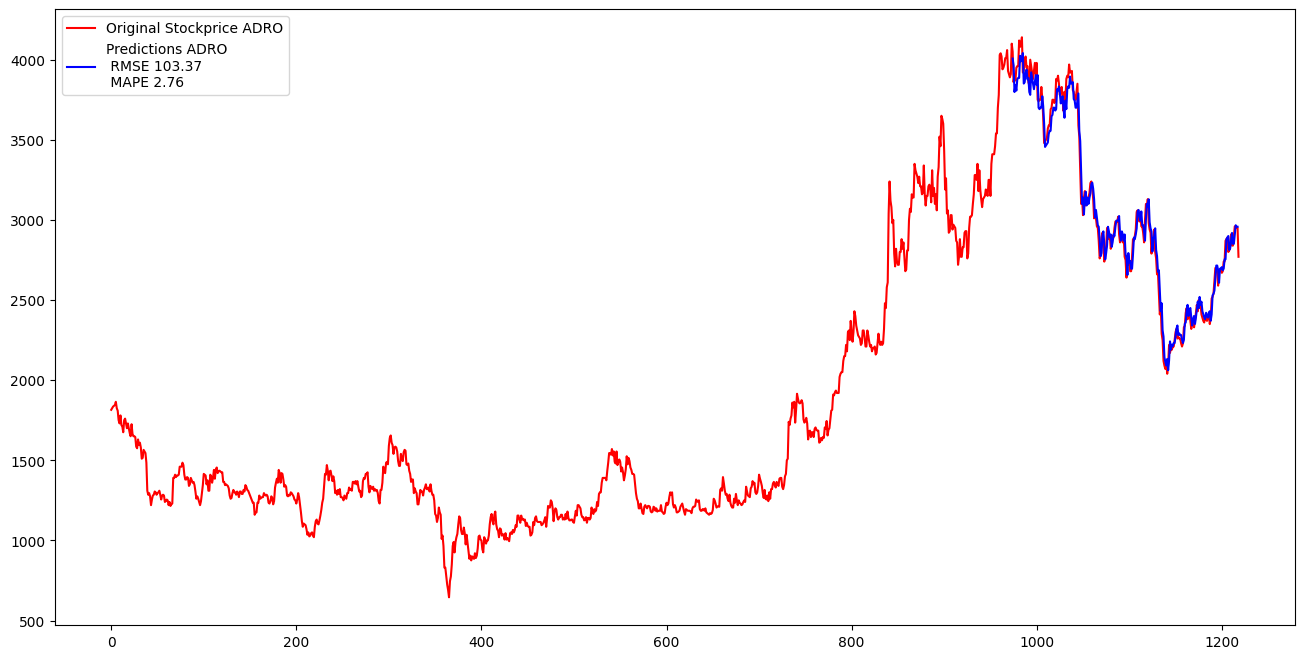

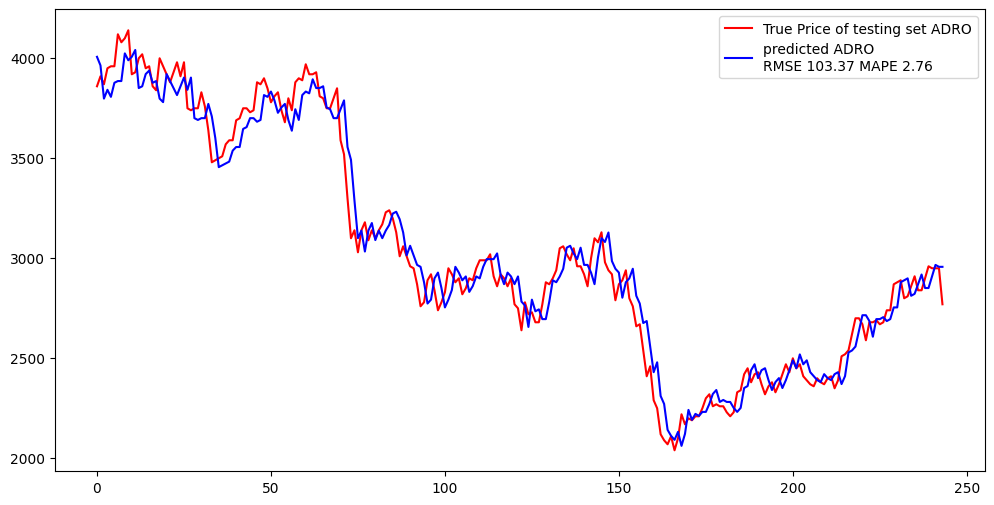

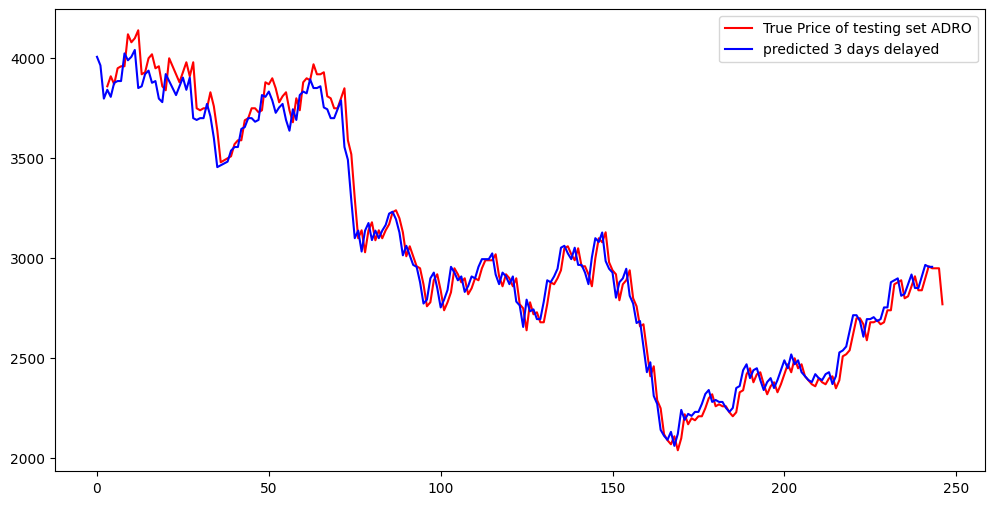

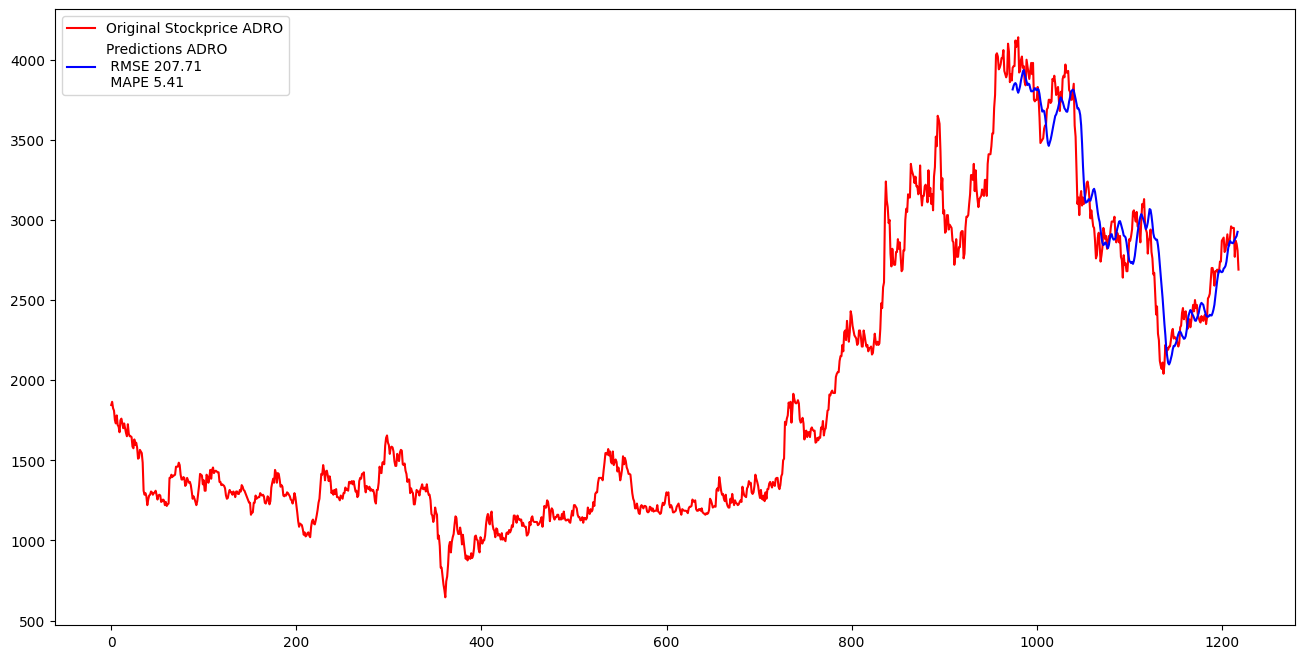

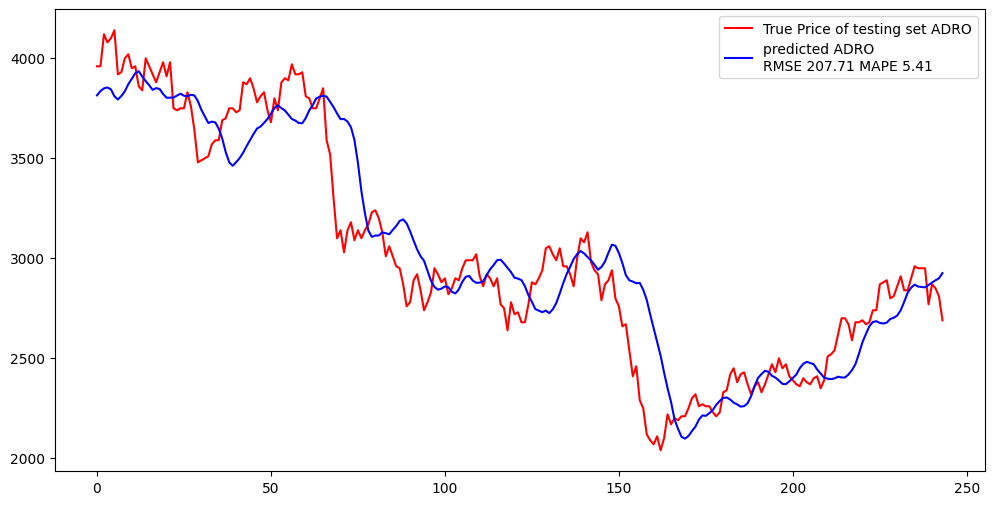

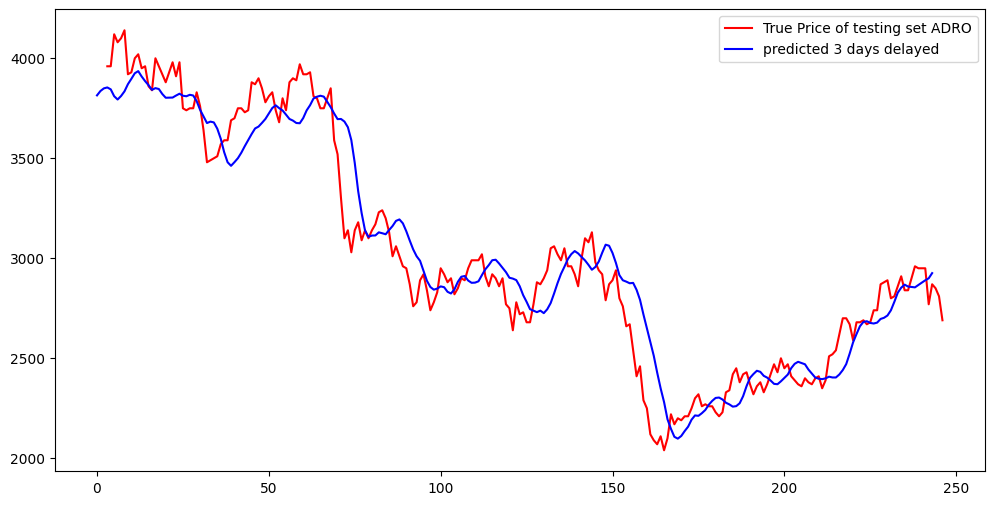

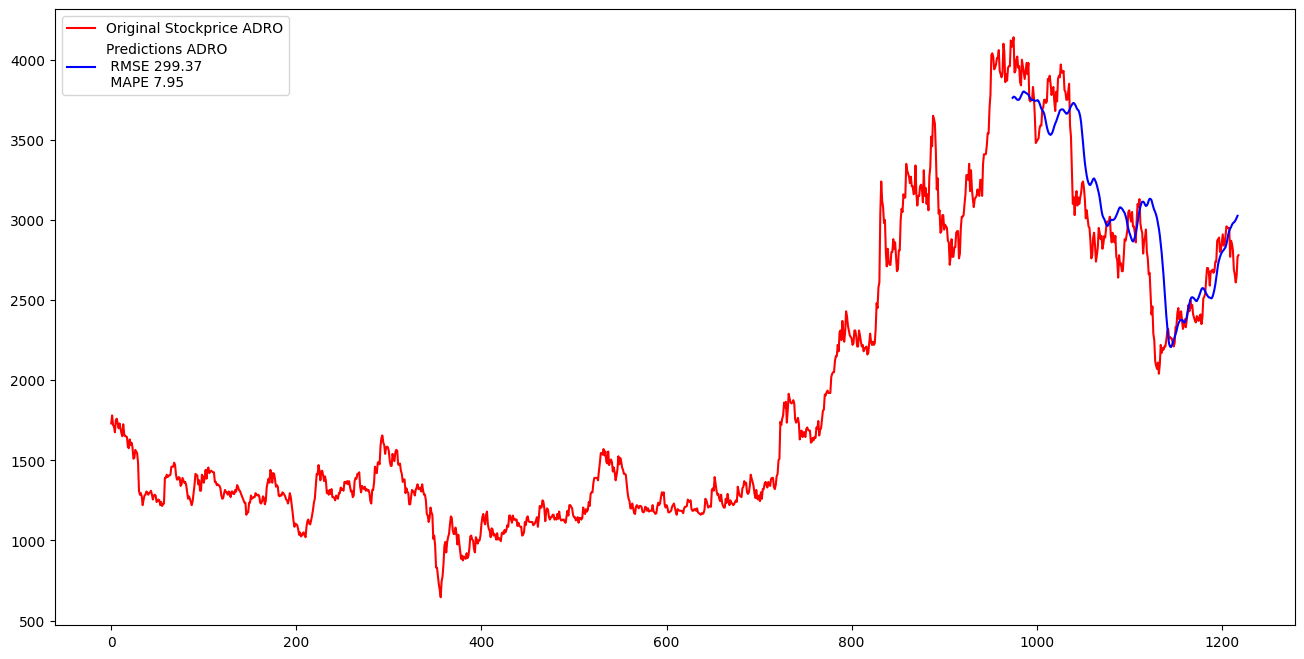

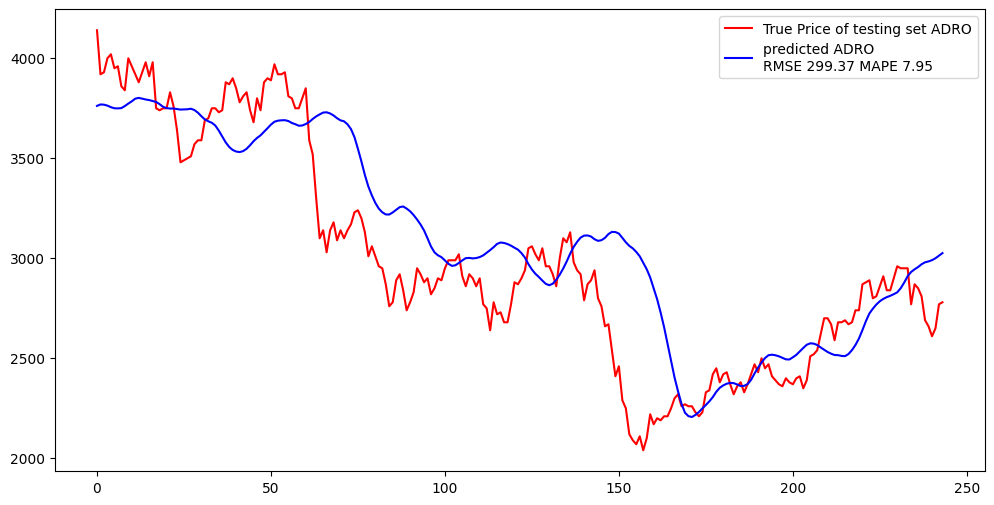

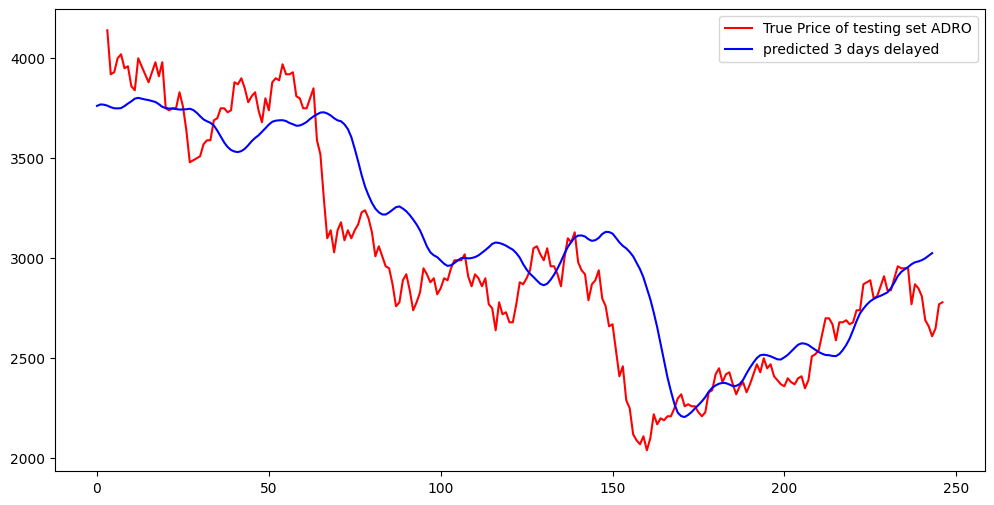

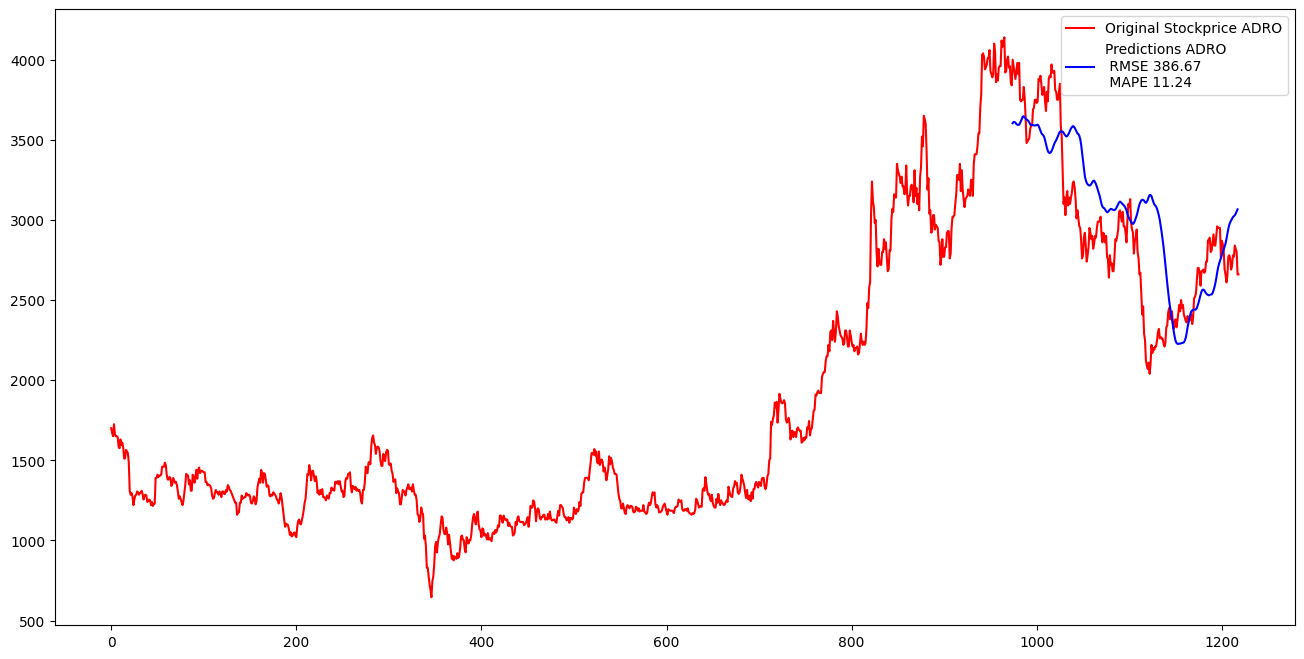

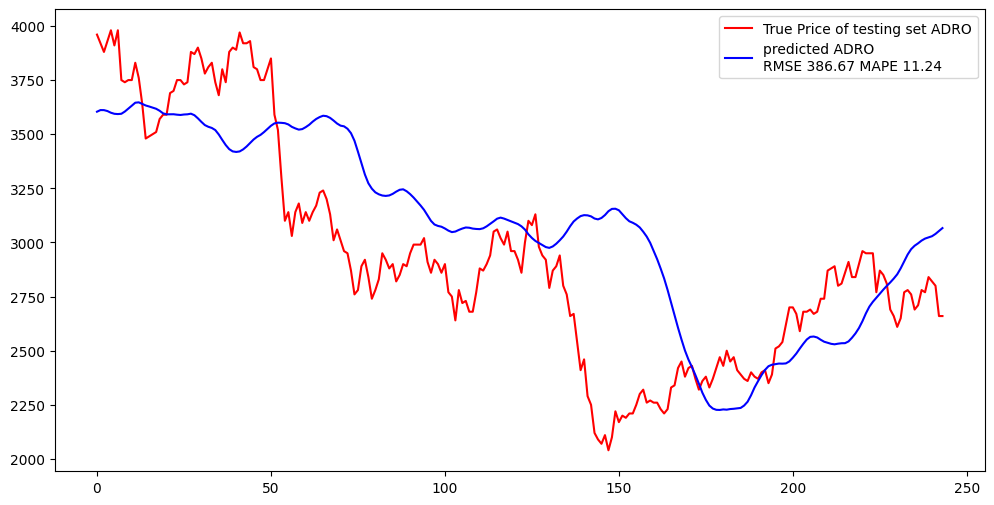

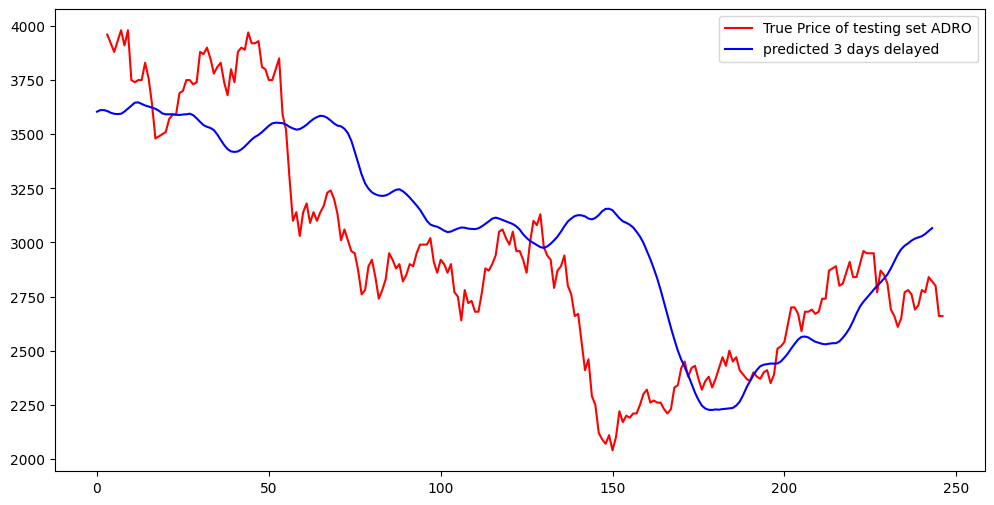

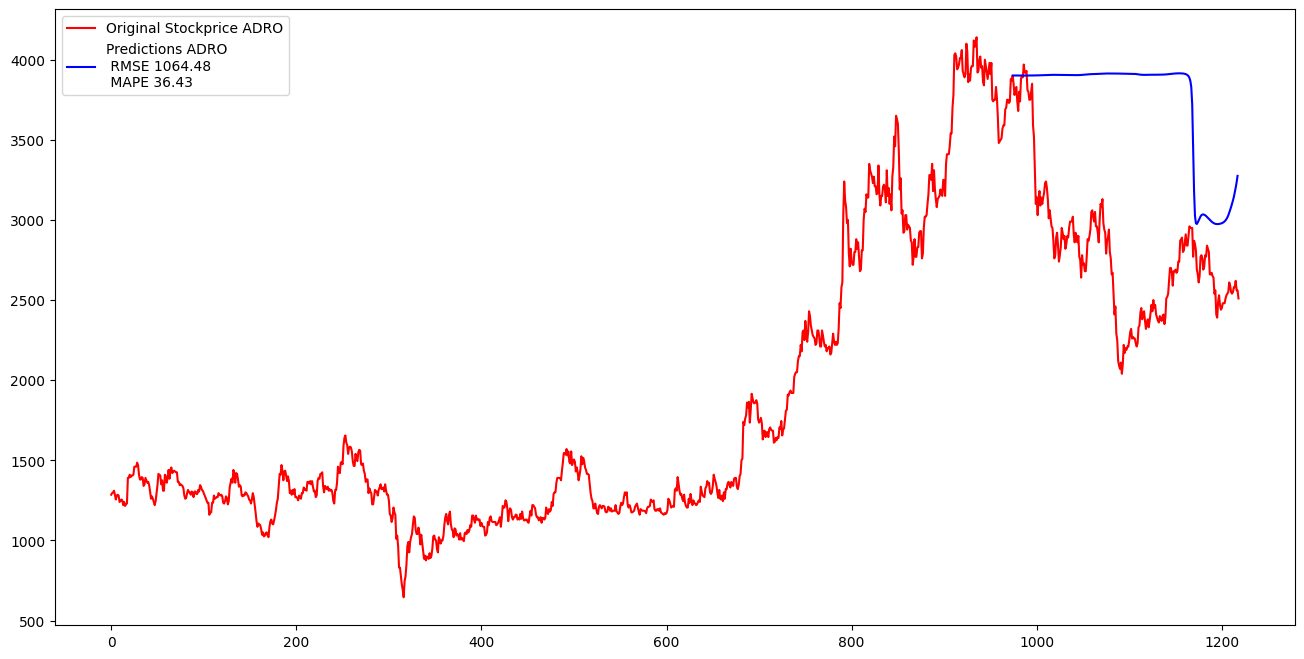

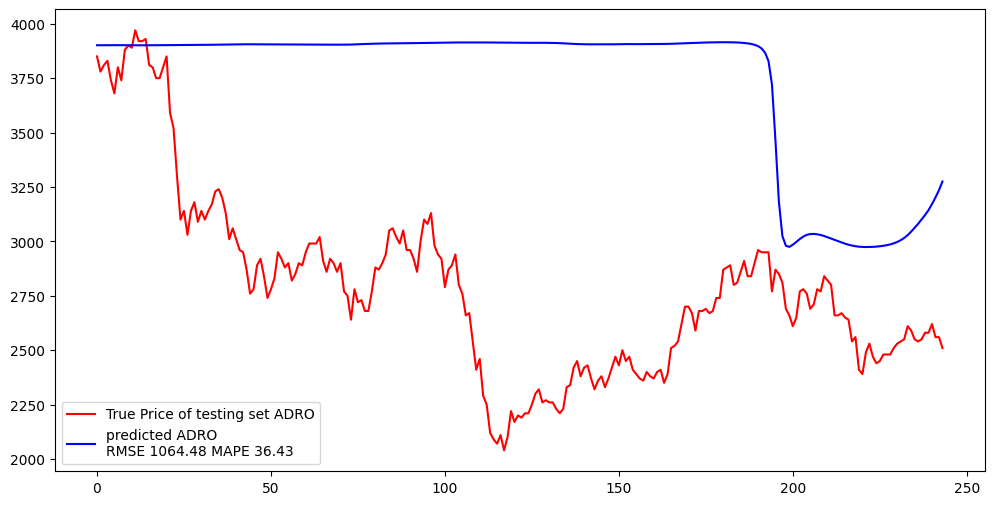

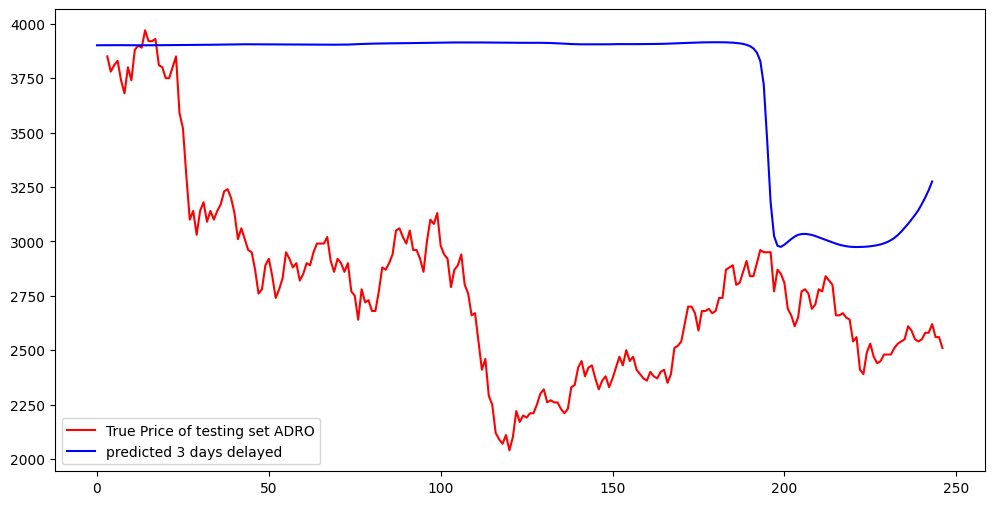

In [6]:
#idx = ["ADRO","ANTM","BMRI", "BNGA", "EXCL", "INCO", "INKP", "MEDC", "PGAS"]
idx = ["ADRO"]
target_days = [1, 5, 10, 20, 50]
percent_threshold = [1.5, 3, 6, 9, 11]

#looping pemanggilan kode emiten dan fitur input yang digunakan
for code in idx:
    for f, g in zip(target_days, percent_threshold):
        for k in range (1,2):

            # == TAHAP PREDIKSI HARGA ==

            ## == 1. PENYIAPAN INPUT ==

            print('code: '+code+', target hari: '+str(f))

            file_name = 'Labelled_Stock_'+code
            df = pd.read_csv('/content/'+file_name+'.csv')

            df_target = set_target(df, f, "close", g) # Set target hari (f) dan threshold (g)

            # Hapus 50 data awal dan akhir
            df = df.drop(df.head(50).index)
            df = df.drop(df.tail(50).index)
            df_target = df_target.drop(df_target.head(50).index)
            df_target = df_target.drop(df_target.tail(50).index)

            df1 = df['close'].values # train input
            df1 = df1.reshape(-1,1)

            df_y = df_target[f"close_{f}"].values # target output
            df_y = df_y.reshape(-1,1)

            # definisi fitur
            m = df1.shape[0] # panjang dataset
            arr = df1
            n=1

            df_old = df_target
            arr = arr.reshape(n,m)
            arr = np.transpose(arr)
            df = arr

            price_mean = np.mean(df_y)

            #definisi data training, testing dan output
            r = 0.8 #ratio jumlah data training terhadap dataset
            l = f #panjang potongan data sekuen untuk memprediksi 1 output berikutnya, UPDATE: panjang sekuens disamakan dengan target hari

            dataset_train = np.array(df[:int(r*m)]) #data training
            dataset_test = np.array(df[int(r*m)-l:]) #data testing

            dataset_train_y = np.array(df_y[:int(r*m),0]) #output training
            dataset_train_y = dataset_train_y.reshape(-1,1)

            dataset_test_y = np.array(df_y[int(r*m)-l:,0]) #output testing
            dataset_test_y = dataset_test_y.reshape(-1,1)

            #normalisasi dataset training range (0,1)
            scaler = MinMaxScaler(feature_range=(0,1))
            dataset_train = scaler.fit_transform(dataset_train)
            dataset_train [:8]

            #normalisasi dataset testing range (0,1)
            dataset_test = scaler.transform(dataset_test)
            dataset_test[:8]

            #normalisasi dataset output training range (0,1)
            scaler2 = MinMaxScaler(feature_range=(0,1))
            dataset_train_y = scaler2.fit_transform(dataset_train_y)
            dataset_train_y [:8]

            #normalisasi dataset output testing range (0,1)
            dataset_test_y = scaler2.transform(dataset_test_y)
            dataset_test_y[:8]

            #create data training input dan output
            x_train, y_train = create_my_dataset(dataset_train,dataset_train_y)

            #create data testing input dan output
            x_test, y_test = create_my_dataset(dataset_test,dataset_test_y)

            # # Hapus 50 data awal dan akhir
            # x_train = x_train[50:]
            # y_train = y_train[50:]
            # x_test = x_test[:-50]
            # y_test = y_test[:-50]

            ## == 2. ARSITEKTUR RNN/ LSTM/ GRU ==

            mode = 'LSTM'

            if mode == 'LSTM':
                #arsitektur LSTM
                model = Sequential()
                model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],n))) #input n fitur
                model.add(Dropout(0.2))
                model.add(LSTM(units=96, return_sequences=True))
                model.add(Dropout(0.2))
                model.add(LSTM(units=96))
                model.add(Dropout(0.2))
                model.add(Dense(units=1)) #3
            elif mode == 'GRU':
                #arsitektur GRU
                model = Sequential()
                model.add(GRU(units=96, return_sequences=True, input_shape=(x_train.shape[1],n), activation='tanh')) #input n fitur
                model.add(Dropout(0.2))
                model.add(GRU(units=96, return_sequences=True, activation='tanh'))
                model.add(Dropout(0.2))
                model.add(GRU(units=96, activation='tanh'))
                model.add(Dropout(0.2))
                model.add(Dense(units=1)) #3

            else:
                #arsitektur Simple RNN
                model = Sequential()
                model.add(SimpleRNN(units=96, return_sequences=True, input_shape=(x_train.shape[1],n))) #input n fitur
                model.add(Dropout(0.2))
                model.add(SimpleRNN(units=96, return_sequences=True))
                model.add(Dropout(0.2))
                model.add(SimpleRNN(units=96))
                model.add(Dropout(0.2))
                model.add(Dense(units=1)) #3

            #model.summary()

            #loss model

            model.compile(loss='mean_squared_error', optimizer='adam')

            results_dir = "/content/Hasil_Prediksi"
            if not os.path.exists(results_dir):
                os.makedirs(results_dir)

            output_name = results_dir+'/stock_prediction_'+mode+'_'+str(f)+'_'+str(k)+'_iter_'+file_name+'.h5'
            if (not os.path.exists(output_name)):
              model.fit(x_train, y_train, epochs=50, batch_size=32)
              model.save(output_name)

            model = load_model(output_name)

            ## == 3. PREDIKSI HARGA ==

            # make predictions
            trainPredict = model.predict(x_train)
            testPredict = model.predict(x_test)

            # invert predictions
            trainPredict = scaler2.inverse_transform(trainPredict) #prediksi harga data training
            trainY = scaler2.inverse_transform(y_train)
            testPredict = scaler2.inverse_transform(testPredict) #prediksi harga data testing
            testY = scaler2.inverse_transform(y_test)

            # calculate RMSE
            trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
            print('RMSE Training: %.2f' % (trainScore))
            testScore = math.sqrt(mean_squared_error(testY, testPredict))
            print('RMSE Testing: %.2f' % (testScore))

            # calculate MAPE
            mape_train = np.mean(np.abs((trainY - trainPredict)/trainY))*100
            print('MAPE Training: %.2f' % (mape_train))
            mape_test = np.mean(np.abs((testY - testPredict)/testY))*100
            print('MAPE Testing: %.2f' % (mape_test))

            #avg price
            #print('Avg Price All: %.2f' % (price_mean))
            avg_price_train = np.mean(trainY)
            #print('Avg Price Train: %.2f' % (avg_price_train))
            avg_price_test = np.mean(testY)
            #print('Avg Price Test: %.2f' % (avg_price_test))

            testY = testY.tolist()
            testPredict = testPredict.tolist()

            #simpan kualitas prediksi ke csv
            output_file = results_dir+'/RMSE_'+mode+'_'+str(f)+'_'+str(k)+'_iter_'+file_name+'.csv'
            file = open(output_file, "w")
            file.write("code,no,iter,avg_price,avg_price_train,avg_price_test,RMSE_train_score,RMSE_test_score,MAPE_train, MAPE_test\n"+code+","+str(f)+","+str(k)+","+str(price_mean)+","+str(avg_price_train)+","+str(avg_price_test)+","+str(trainScore)+","+str(testScore)+","+str(mape_train)+","+str(mape_test))
            file.close()

            #visualisasi hasil
            #img1
            fig, ax = plt.subplots(figsize=(16,8))
            plt.plot(df_y[:,0], color='red', label='Original Stockprice '+code)
            ax.plot(range(len(y_train)+l-1, len(y_train)+l+len(testPredict)-1),testPredict,color='blue', label='Predictions '+code+'\n RMSE %.2f' %(testScore)+'\n MAPE %.2f' %(mape_test))
            plt.legend()
            plt.savefig(results_dir+'/img1_'+mode+'_'+str(f)+'_'+str(k)+'_iter_'+file_name+'.png')

            #img2
            y_test_scaled = scaler2.inverse_transform(y_test.reshape(-1,1))
            fig, ax = plt.subplots(figsize=(12,6))
            ax.plot(y_test_scaled, color='red', label = 'True Price of testing set '+code)
            plt.plot(testPredict, color = 'blue', label='predicted '+code+'\nRMSE %.2f' %(testScore) + ' MAPE %.2f' %(mape_test))
            plt.legend()
            plt.savefig(results_dir+'/img2_'+mode+'_'+str(f)+'_'+str(k)+'_iter_'+file_name+'.png')

            #img3
            delay = 3
            y_test_scaled = scaler2.inverse_transform(y_test.reshape(-1,1))
            fig, ax = plt.subplots(figsize=(12,6))
            ax.plot(range(delay,len(y_test_scaled)+delay),y_test_scaled, color='red', label = 'True Price of testing set '+code)
            plt.plot(testPredict, color = 'blue', label='predicted '+str(delay)+' days delayed')
            plt.legend()

            ## == 3. PREDIKSI PERUBAHAN HARGA (deltaPrice) ==

            #penyiapan data
            train_day,test_day = get_slice(m,r,'datetime',0) #data prediksi hari ke-
            train_ctmin1,test_ctmin1 = get_slice(m,r,f'close_{f}',-1) #data harga close t-1

            flag_training = np.ones((len(train_day),1))
            flag_testing = np.zeros((len(test_day),1))

            d_predict_train = trainPredict-train_ctmin1 #delta harga prediksi data training
            d_predict_test = testPredict-test_ctmin1 #delta harga prediksi data testing
            pd_predict_train = 100*d_predict_train/train_ctmin1 #%delta harga prediksi data training
            pd_predict_test = 100*d_predict_test/test_ctmin1 #%delta harga prediksi data testing

            d_actual_train = trainY-train_ctmin1 #delta harga actual data training
            d_actual_test = testY-test_ctmin1 #delta harga actual data testing
            pd_actual_train = 100*d_actual_train/train_ctmin1 #%delta harga actual data training
            pd_actual_test = 100*d_actual_test/test_ctmin1 #%delta harga actual data testing

            #simpan hasil training ke csv
            training_result = np.hstack((train_day,train_ctmin1,trainPredict,trainY, d_predict_train, pd_predict_train, d_actual_train, pd_actual_train, flag_training)) #merge vector to matrix
            nama_file = results_dir+'/training_result_'+mode+'_'+str(f)+'_'+str(k)+'_iter_'+file_name+'.csv'
            df_c = pd.DataFrame(training_result)
            df_c.columns = ['datetime','priceT-1','predict', 'actual', 'dPredict', '%dPredict','dAct', '%dAct', 'flagTraining' ]
            df_c.to_csv(nama_file,index=False)

            #simpan hasil testing ke csv
            testing_result = np.hstack((test_day,test_ctmin1,testPredict,testY, d_predict_test, pd_predict_test, d_actual_test, pd_actual_test, flag_testing)) #merge vector to matrix
            nama_file = results_dir+'/testing_result_'+mode+'_'+str(f)+'_'+str(k)+'_iter_'+file_name+'.csv'
            df_c = pd.DataFrame(testing_result)
            df_c.columns = ['datetime','priceT-1','predict', 'actual', 'dPredict', '%dPredict','dAct', '%dAct', 'flagTraining' ]
            df_c.to_csv(nama_file,index=False)

            #simpan hasil testing ke csv
            result = np.concatenate((training_result,testing_result))
            nama_file = results_dir+'/result_'+mode+'_'+str(f)+'_'+str(k)+'_iter_'+file_name+'.csv'
            df_c = pd.DataFrame(result)
            df_c.columns = ['datetime','priceT-1','predict', 'actual', 'dPredict', '%dPredict','dAct', '%dAct', 'flagTraining' ]
            df_c.to_csv(nama_file,index=False)

code: ADRO, target hari: 1,iterasi: 1
* RMSE Training: 88.20
* RMSE Testing: 135.12
* MAPE Training: 3.36
* MAPE Testing: 3.51
---
code: ADRO, target hari: 5,iterasi: 1
* RMSE Training: 158.49
* RMSE Testing: 261.78
* MAPE Training: 7.15
* MAPE Testing: 6.71
---
code: ADRO, target hari: 10,iterasi: 1
* RMSE Training: 201.46
* RMSE Testing: 295.77
* MAPE Training: 8.26
* MAPE Testing: 8.32
---
code: ADRO, target hari: 20,iterasi: 1
* RMSE Training: 236.66
* RMSE Testing: 403.37
* MAPE Training: 10.56
* MAPE Testing: 11.65
---
code: ADRO, target hari: 50,iterasi: 1
* RMSE Training: 189.85
* RMSE Testing: 983.14
* MAPE Training: 8.25
* MAPE Testing: 35.51




